# Aca empezaria el analisis por continente

1.Asignación de continentes:
Utilizando como referencia pais_continente.csv se asignó a 80 paises un continente


In [35]:
import pandas as pd

df_medallas = pd.read_csv("../data/medallas_historicas.csv")
df_continentes = pd.read_csv("../data/pais_continente.csv")

df_merged = pd.merge(df_medallas, df_continentes, on="País", how="left")

print(df_merged[["País", "Continente"]].drop_duplicates())

paises_sin_continente = df_merged[df_merged["Continente"].isna()]["País"].unique()

print("Países sin continente asignado:")
for pais in paises_sin_continente:
    print(pais)

print(df_merged.columns)

               País Continente
0     United States    America
1            Greece     Europe
2           Germany     Europe
3            France     Europe
4     Great Britain     Europe
...             ...        ...
1058         Kosovo        NaN
1059         Cyprus        NaN
1060     Tajikistan        NaN
1061        Albania        NaN
1062     Cape Verde        NaN

[123 rows x 2 columns]
Países sin continente asignado:
Mixed team
Bohemia
Australasia
Russian Empire
Haiti
Ceylon
Bahamas
Pakistan
Iraq
Ghana
Tanzania
Guyana
Unified Team
Israel
FR Yugoslavia
Burundi
Namibia
Malaysia
Costa Rica
Eritrea
Afghanistan
Botswana
Bahrain
Fiji
Qatar
Bermuda
Kyrgyzstan
Jordan
Individual Neutral Athletes
Guatemala
Dominica
Kosovo
Cyprus
Tajikistan
Albania
Cape Verde
Index(['Año', 'País', 'Oro', 'Plata', 'Bronce', 'Total', 'Continente'], dtype='object')


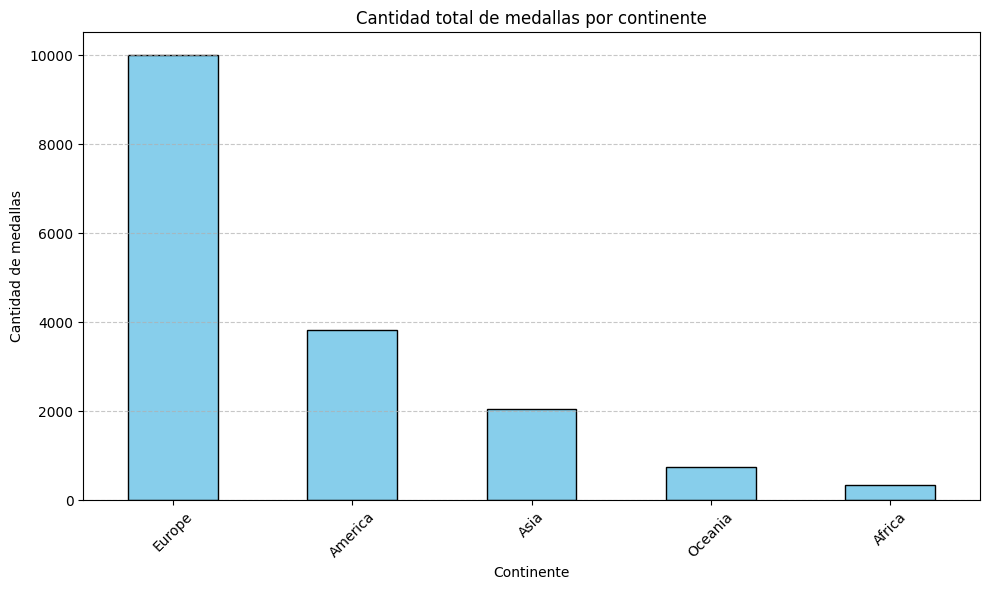

In [36]:
import matplotlib.pyplot as plt

# Eliminamos filas sin continente asignado
df_validos = df_merged.dropna(subset=["Continente"])

# Agrupamos por continente y contamos medallas
medallas_por_continente = df_validos.groupby("Continente")["Total"].sum().sort_values(ascending=False)

# Visualizamos
plt.figure(figsize=(10,6))
medallas_por_continente.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Cantidad total de medallas por continente")
plt.ylabel("Cantidad de medallas")
plt.xlabel("Continente")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
# Filtrar países sin continente asignado
sin_continente = df_merged[df_merged["Continente"].isna()]

# Contar medallas por país
medallas_sin_continente = sin_continente.groupby("País")["Total"].sum()

# Ordenar de mayor a menor
medallas_sin_continente = medallas_sin_continente.sort_values(ascending=False)

# Mostrar resultados
print("Países sin continente asignado que más medallas ganaron:")
print(medallas_sin_continente)


Países sin continente asignado que más medallas ganaron:
País
Unified Team                   112
Australasia                     12
Israel                          11
Kyrgyzstan                       9
Mixed team                       9
Russian Empire                   8
Bahamas                          8
Bahrain                          7
Malaysia                         7
FR Yugoslavia                    7
Individual Neutral Athletes      5
Pakistan                         4
Botswana                         4
Bohemia                          4
Qatar                            3
Tajikistan                       3
Afghanistan                      2
Albania                          2
Costa Rica                       2
Burundi                          2
Namibia                          2
Guatemala                        2
Jordan                           2
Kosovo                           2
Tanzania                         2
Guyana                           1
Cape Verde                  

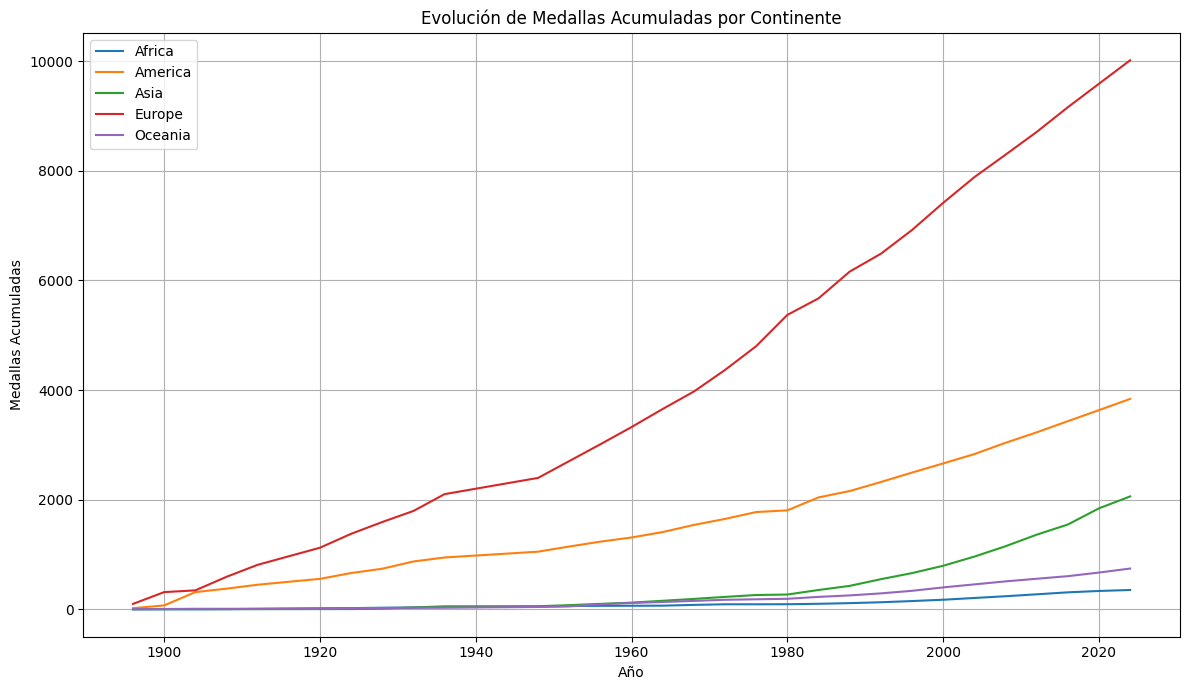

In [37]:
import matplotlib.pyplot as plt

# Filtramos los registros válidos (con continente asignado)
df_validos = df_merged.dropna(subset=["Continente"])

# Agrupamos por Año y Continente, y sumamos la columna 'Total'
medallas_por_anio_continente = (
    df_validos.groupby(["Año", "Continente"])["Total"].sum().reset_index()
)

# Pivot para tener años como índice y continentes como columnas
pivot = medallas_por_anio_continente.pivot(index="Año", columns="Continente", values="Total").fillna(0)

# Calculamos el acumulado
pivot_acumulado = pivot.cumsum()

# Graficamos
plt.figure(figsize=(12, 7))
for continente in pivot_acumulado.columns:
    plt.plot(pivot_acumulado.index, pivot_acumulado[continente], label=continente)

plt.title("Evolución de Medallas Acumuladas por Continente")
plt.xlabel("Año")
plt.ylabel("Medallas Acumuladas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


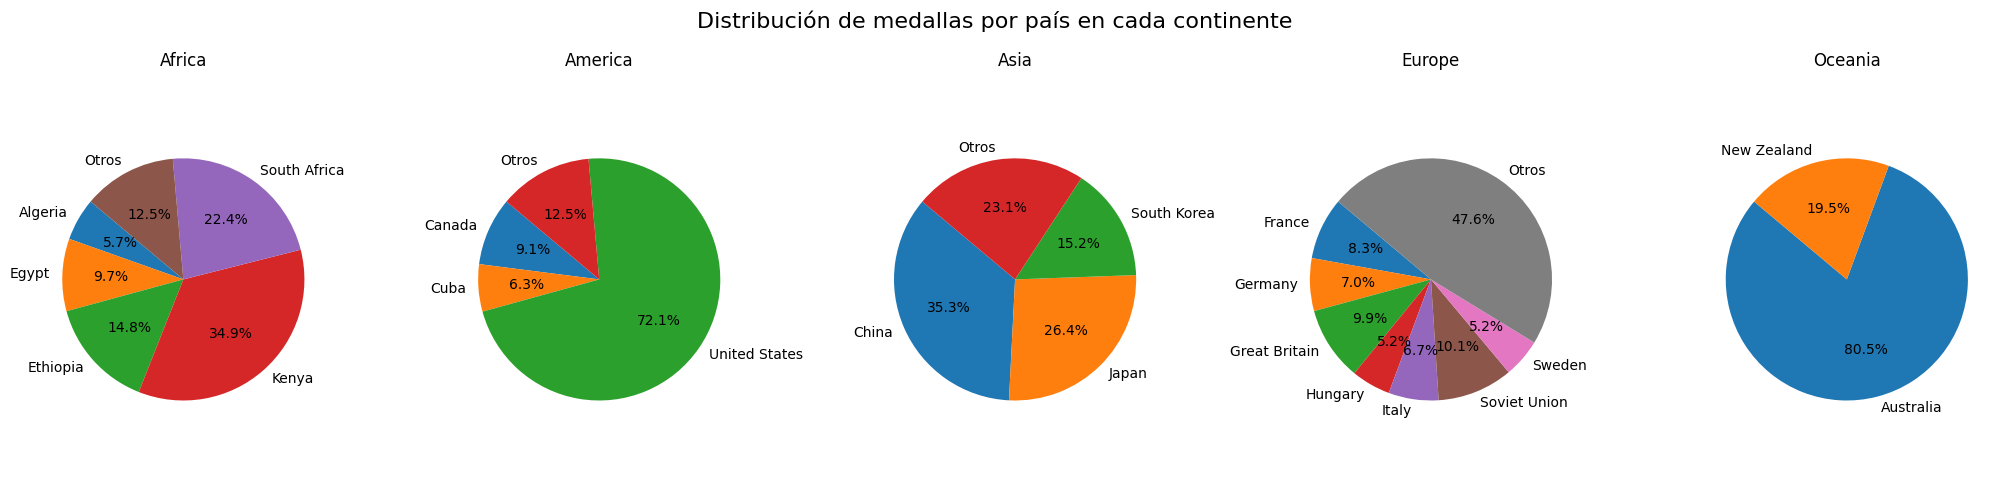

In [38]:
import matplotlib.pyplot as plt

# Filtramos continentes válidos
continentes = df_validos["Continente"].dropna().unique()

# Configuración de figura
fig, axs = plt.subplots(1, len(continentes), figsize=(20, 5))
fig.suptitle("Distribución de medallas por país en cada continente", fontsize=16)

for i, continente in enumerate(sorted(continentes)):
    # Filtramos el dataframe por continente
    df_cont = df_validos[df_validos["Continente"] == continente]
    
    # Agrupamos por país y sumamos medallas totales
    medallas_pais = df_cont.groupby("País")["Total"].sum()
    
    # Calculamos el porcentaje por país
    porcentaje = 100 * medallas_pais / medallas_pais.sum()
    
    # Separar países con >=5% de participación
    principales = porcentaje[porcentaje >= 5]
    otros = porcentaje[porcentaje < 5].sum()
    
    # Combinamos en una sola serie
    data = principales.copy()
    if otros > 0:
        data["Otros"] = otros

    # Plot de torta
    axs[i].pie(data, labels=data.index, autopct="%1.1f%%", startangle=140)
    axs[i].axis("equal")
    axs[i].set_title(continente)

plt.tight_layout()
plt.show()
